#  CROSS VALIDATION

In [1]:
#importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, roc_curve


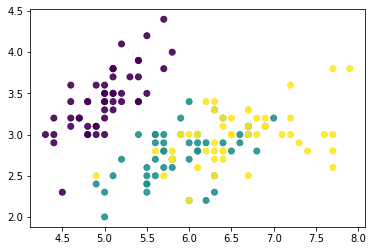

In [2]:
# Nuage des points des types d'iris en fonction des critères (longueur et largeur des pétales)
iris = load_iris()
x = iris.data
y = iris.target

plt.scatter(x[:, 0], x[:, 1], c=y, alpha = 0.9)

In [3]:
#tailles des variables explicatives et de la variable à estimer(type de fleur d'iris)
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
#Train and Test Sampling
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3)

#taille de l'échantillon d'apprentissage et de test
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


Text(0.5, 1.0, 'Test Set')

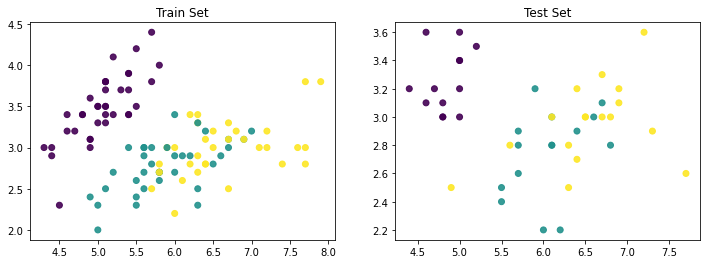

In [5]:
# longueur et largeur des pétales dans les échantillons d'apprentissage et de test
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha = 0.9)
plt.title('Train Set')

plt.subplot(122)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, alpha = 0.9)
plt.title('Test Set')

In [6]:
# Let's train the model for a specified number of neighbors
from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier(5)
Model.fit(x_train, y_train)

# scrore (taux de bon classement)  lorsqu'on teste sur l'échantillon d'apprentissage 
print('Train  score', Model.score(x_train, y_train))
# scrore (taux de bon classement)  lorsqu'on teste sur l'échantillon de test 
print('Test  score', Model.score(x_test, y_test))

Train  score 0.9809523809523809
Test  score 0.9333333333333333


In [7]:
# Cross Validation - Ici on s'interrèse juste à l'échantilloon d'apprentissage
# Cross Validation pour 3 classes (cv=3) et 5 voisins & Distance eucledienne 
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=5), x_train, y_train, cv=3, scoring='accuracy')

array([0.97142857, 1.        , 0.97142857])

In [8]:
# Validation liée aux hyperparamètres : Nb de voisins = 5 & Distance eucledienne 
# Qui est donc la moyenne des cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=5), x_train, y_train, cv=3, scoring='accuracy').mean()

0.980952380952381

Text(0, 0.5, 'Validation')

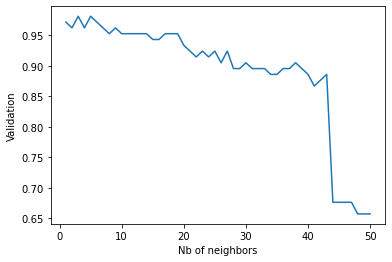

In [9]:
# Courbes des validation en fonctions du nombre de voisins
val_score = []
for k in range(1, 51):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), x_train, y_train, cv=3, scoring='accuracy').mean()
    val_score.append(score)
plt.plot(range(1, 51),val_score)
plt.xlabel('Nb of neighbors')
plt.ylabel('Validation')


In [10]:
# Nbre de voisins correspondant à la validation maximale
val_score.index(max(val_score))+1

3

In [11]:
#Let's use validation curve
# Hyperparamètre : Nb de voisin entre 1 et 50
from sklearn.model_selection import validation_curve
Model = KNeighborsClassifier()
k = np.arange(1, 51)
train_score, val_score = validation_curve(Model, x_train, y_train, 'n_neighbors', k, cv=3)

# tableau contenant les validations faites sur l'échantillon d'apprentissage de l'échantillon d'apprentissage de départ
print(train_score.shape)
# tableau contenant les validations faites sur l'échantillon test de l'échantillon d'apprentissage de départ
print(val_score.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(50, 3)
(50, 3)


(50, 3)


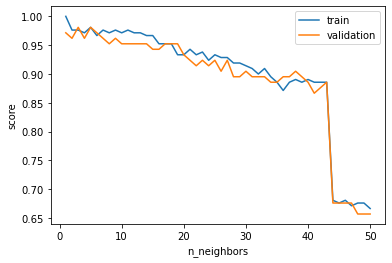

In [12]:
# Comparaison des courbes de validations des échantillons d'apprentissage & test de l'échantillon d'apprentissage de départ
# dans le but de detecter l'overfitting (Sur apprentissage)
print(val_score.shape)
plt.plot(k, train_score.mean(axis=1), label = 'train')
plt.plot(k, val_score.mean(axis=1), label = 'validation')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
# Ici les courbes ont la même allure donc il n'y a pas d'overfitting

In [13]:
# Methodes de cross validations
# importations
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

# configurations
# KFold (avec un nombre classe donné)
kf = KFold(3, random_state = 0)

# Stratified KFold (KFold avec un échantillon représentatif)
Skf = StratifiedKFold(3, random_state = 0)

# Leave One Out (KFold avec un nombre classe égale à laille de l'échantillon d'apprentissage) 
loo = LeaveOneOut()

# Shuffke Split (Ici l'échantillon d'apprentissage n'est pas divisé en classe, mais on effectué un nombre de TAS donné)
ssplit = ShuffleSplit(3, test_size = 0.3, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [14]:
# nb de voisin
n = 9

# Validation par méthode, pour l'hyperparamêtre nb de voisin = n
# KFold
kf_lst = cross_val_score(KNeighborsClassifier(n), x_train, y_train, cv = kf)
print(kf_lst,'Mean :', kf_lst.mean())

# Stratified KFold 
Skf_lst = cross_val_score(KNeighborsClassifier(n), x_train, y_train, cv = Skf)
print(Skf_lst, 'Mean :', Skf_lst.mean())

# Leave One Out 
loo_lst = cross_val_score(KNeighborsClassifier(n), x_train, y_train, cv = loo)
print(loo_lst, 'Mean :', loo_lst.mean())

# Shuffke Split 
ssplit_lst = cross_val_score(KNeighborsClassifier(n), x_train, y_train, cv = ssplit)
print(ssplit_lst, 'Mean :', ssplit_lst.mean())

[0.97142857 1.         0.91428571] Mean : 0.9619047619047619
[0.97142857 1.         0.91428571] Mean : 0.9619047619047619
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1.] Mean : 0.9714285714285714
[1.     1.     0.9375] Mean : 0.9791666666666666


In [15]:
#GridsearchCV - Pour trouver les meilleurs hyperparamêtres de ce modèle
from sklearn.model_selection import GridSearchCV

# soient le nb de voisin situé en 1 et 10, et les types de 
param_grid = {'n_neighbors': np.arange(1, 11), 'metric': ['euclidean', 'manhattan','minkowski', 'chebyshev'] , 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = StratifiedKFold(3, random_state = 0))

grid.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']})

In [16]:
# Meilleurs hyperparamètre
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [17]:
# score obtenu dans l'échantillon d'apprentissage avec les meilleurs hyperparamètre
grid.best_score_

0.9904761904761905

In [18]:
# precision obtenu dans l'échantillon d'apprentissage avec les meilleurs hyperparamètre
precision_score(y_train, grid.predict(x_train), pos_label='positive',average='micro')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


1.0

In [19]:
# Estimateurs du modèle ayant les meilleurs hyperparamètre
grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [20]:
#Let's save the best model
model_GSCV = grid.best_estimator_

In [21]:
# score du modèle d'apprentissage avec les meilleurs hyperparamètre
model_GSCV.score(x_test, y_test)

0.9333333333333333

In [22]:
# prediction à partir de l'échantillon test
y_pred = model_GSCV.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0,
       1])

In [23]:
# Matrice de confusion du modèle
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 15]], dtype=int64)

In [41]:
# Taux de bon scrore, Precisions & Rappels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.93      0.90        15
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [25]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_test)
y_t =lb.transform(y_test)
y_t

lb.fit(grid.predict(x_test))
y_p =lb.transform(grid.predict(x_test))
y_p
roc_auc_score(y_t, y_p, multi_class='ovo', average='micro')

0.95

In [26]:
# Prediction sur une nouvelle feuille
Feuille_Line = np.array([2.3, 1.6, 4, 3.1])
Feuille_Line = Feuille_Line.reshape(1, 4)
Feuille_Line.shape

(1, 4)

In [27]:
# prédiction sur la nouvelle feuille 
y_pred_FL = model_GSCV.predict(Feuille_Line)
y_pred_FL

array([1])

In [28]:
# prédiction sur la nouvelle feuille 
y_pred_proba_FL = model_GSCV.predict_proba(Feuille_Line)
y_pred_proba_FL

array([[0., 1., 0.]])

# Trouvons les meilleurs meilleurs hyper parametre et la meilleure méthode de CV

In [29]:
#GridsearchCV - Pour trouver les meilleurs hyperparamêtres de ce modèle
# Nuage des points des types d'iris en fonction des critères (longueur et largeur des pétales)
iris = load_iris()
x = iris.data
y = iris.target

LabelBinarizer()

In [30]:
#GridsearchCV - Pour trouver les meilleurs hyperparamêtres de ce modèle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
lb = LabelBinarizer()
lb.fit(grid.predict(x_test))
lb.fit(y_test)


LabelBinarizer()

In [31]:
# soient le nb de voisin situé en 1 et 10, et les types de distances Eucledienne et Manhattan
param_grid = {'n_neighbors': np.arange(1, 11), 'metric': ['euclidean', 'manhattan','minkowski', 'chebyshev']
              , 'weights': ['uniform', 'distance']}

#lst=[]
#for i in range(2, 31) :
#    grid_skf = GridSearchCV(KNeighborsClassifier(), param_grid, cv = StratifiedKFold(i))
#    grid_skf.fit(x_train, y_train)
#    lst.append(grid_skf.score(x_test, y_test))

#clss=lst.index(max(lst))+2

grid_skf = GridSearchCV(KNeighborsClassifier(), param_grid, cv = StratifiedKFold(4), scoring='accuracy')
grid_skf.fit(x_train, y_train)

    
print('StratifiedKFold ', 'estimateur :',grid_skf.best_estimator_, grid_skf.best_score_
      ,'taux de bon scrore:',  grid_skf.score(x_test, y_test)
     ,'precision :',precision_score(y_test, grid_skf.predict(x_test), pos_label='positive',average='micro')
     ,'rappel :',recall_score(y_test, grid_skf.predict(x_test), pos_label='positive',average='micro')
     ,'aire score aire :', roc_auc_score(lb.transform(y_test), lb.transform(grid_skf.predict(x_test))) )
print(confusion_matrix(y_test, grid_skf.predict(x_test)) )


StratifiedKFold  estimateur : KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance') 0.9903846153846154 taux de bon scrore: 0.9333333333333333 precision : 0.9333333333333333 rappel : 0.9333333333333333 aire score aire : 0.952217553688142
[[13  0  0]
 [ 0 14  1]
 [ 0  2 15]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [32]:
print(grid_skf.scoring)

accuracy


In [33]:


# soient le nb de voisin situé en 1 et 10, et les types de distances Eucledienne et Manhattan
param_grid = {'n_neighbors': np.arange(1, 11), 'metric': ['euclidean', 'manhattan','minkowski', 'chebyshev'] , 'weights': ['uniform', 'distance']}
grid_kf = GridSearchCV(KNeighborsClassifier(), param_grid, cv = KFold(3, random_state = 0))
grid_kf.fit(x_train, y_train)
print('KFold :', grid_kf.best_score_, grid_kf.best_estimator_)

# soient le nb de voisin situé en 1 et 10, et les types de distances Eucledienne et Manhattan
param_grid = {'n_neighbors': np.arange(1, 11), 'metric': ['euclidean', 'manhattan']}
grid_loo = GridSearchCV(KNeighborsClassifier(), param_grid, cv = LeaveOneOut())
grid_loo.fit(x_train, y_train)
print('LeaveOneOut :', grid_loo.best_score_, grid_loo.best_estimator_)

# soient le nb de voisin situé en 1 et 10, et les types de distances Eucledienne et Manhattan
param_grid = {'n_neighbors': np.arange(1, 11), 'metric': ['euclidean', 'manhattan']}
grid_ss = GridSearchCV(KNeighborsClassifier(), param_grid, cv = ShuffleSplit(3, test_size = 0.3, random_state = 0))
grid_ss.fit(x_train, y_train)
print('ShuffleSplit :', grid_ss.best_score_, grid_ss.best_estimator_)

# soient le nb de voisin situé en 1 et 10, et les types de distances Eucledienne et Manhattan
param_grid = {'n_neighbors': np.arange(1, 11), 'metric': ['euclidean', 'manhattan']}
grid_sss = GridSearchCV(KNeighborsClassifier(), param_grid, cv = StratifiedShuffleSplit(3, test_size = 0.3, random_state = 0))
grid_sss.fit(x_train, y_train)
print('StratifiedShuffleSplit :', grid_sss.best_score_, grid_sss.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KFold : 0.9904761904761905 KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')
LeaveOneOut : 0.9714285714285714 KNeighborsClassifier(metric='euclidean', n_neighbors=9)
ShuffleSplit : 0.9791666666666666 KNeighborsClassifier(metric='euclidean', n_neighbors=7)
StratifiedShuffleSplit : 0.96875 KNeighborsClassifier(metric='manhattan')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.93      0.90        15
           2       0.94      0.88      0.91        17

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45



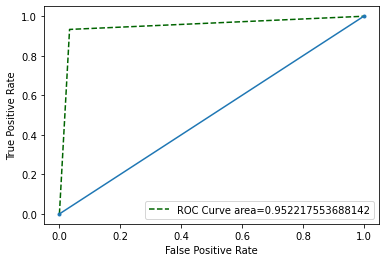

In [76]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)
y_t =lb.transform(y_test)
y_t

lb.fit(grid.predict(x_test))
y_p =lb.transform(grid.predict(x_test))
y_p
print(classification_report(y_t, y_p))
fpr, tpr, threshold = roc_curve(y_t.ravel(), y_p.ravel())

# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='--',label="ROC Curve area="+str(roc_auc_score(y_t, y_p)), color='darkgreen')#, label='No Skill'
plt.plot([0, 1], [0, 1], marker='.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()






In [70]:
#y_t.ravel(), y_p.ravel()
roc_auc_score(y_t.ravel(), y_p.ravel()), roc_auc_score(y_t, y_p)


(0.95, 0.952217553688142)

In [74]:
y_test,y_t

(array([0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1,
        0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0,
        1]),
 array([[1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
   